In [233]:
# import those beauties
import pandas as pd
import geopandas as gpd
import geopy
from geopandas.tools import geocode
import contextily as ctx
from geopy.geocoders import Nominatim
import csv
import shapely
import matplotlib.pyplot as plt
import matplotlib.colors 
import numpy as np
import math
import seaborn as sns
from geopandas import GeoDataFrame
from shapely.geometry import Polygon, Point

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# import and merge datasets

In [132]:
#real_raw = pd.read_csv('/Users/trevorban/Desktop/ames_project/Machine Learning Project Proposal/data/Ames_Real_Estate_Data.csv')
#train_raw = pd.read_csv('/Users/trevorban/Desktop/ames-housing-prediction/Data_Master/TRAIN_with_dummies.csv')
#test_raw = pd.read_csv('/Users/trevorban/Desktop/ames-housing-prediction/Data_Master/TEST_with_dummies.csv')

In [133]:
df_raw = pd.read_csv('/Users/trevorban/Desktop/ames-housing-prediction/Trevor_Ban/data/Ames_Housing_Price_Data.csv')
real_raw = pd.read_csv('/Users/trevorban/Desktop/ames-housing-prediction/Trevor_Ban/data/Ames_real_Estate_Data.csv')

In [134]:
df1 = df_raw.copy()
real = real_raw.copy()

In [135]:
#train_raw.shape

In [136]:
real = real[['MapRefNo', 'Prop_Addr', 'Neighborhood']]

In [137]:
real['Address'] = real['Prop_Addr'] + " Ames Iowa"

In [138]:
# train = train.merge(real, how='left', on = 'MapRefNo')
# test = test.merge(real, how='left', on = 'MapRefNo')
df1 = df1.merge(real, how='left', left_on = 'PID', right_on='MapRefNo')

In [139]:
df1.head()

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
0           1  909176150        856     126000          30       RL   
1           2  905476230       1049     139500         120       RL   
2           2  905476230       1049     139500         120       RL   
3           3  911128020       1001     124900          30  C (all)   
4           4  535377150       1039     114000          70       RL   

   LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig  \
0          NaN     7890   Pave   NaN      Reg         Lvl    AllPub    Corner   
1         42.0     4235   Pave   NaN      Reg         Lvl    AllPub    Inside   
2         42.0     4235   Pave   NaN      Reg         Lvl    AllPub    Inside   
3         60.0     6060   Pave   NaN      Reg         Lvl    AllPub    Inside   
4         80.0     8146   Pave   NaN      Reg         Lvl    AllPub    Corner   

  LandSlope Neighborhood_x Condition1 Condition2 BldgType HouseStyle  \
0       Gtl          SWISU       Norm       Norm     1Fam     1Story   
1       Gtl        Edwards       Norm       Norm   TwnhsE     1Story   
2       Gtl        Edwards       Norm       Norm   TwnhsE     1Story   
3       Gtl         IDOTRR       Norm       Norm     1Fam     1Story   
4       Gtl        OldTown       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            6            6       1939          1950     Gable  CompShg   
1            5            5       1984          1984     Gable  CompShg   
2            5            5       1984          1984     Gable  CompShg   
3            5            9       1930          2007       Hip  CompShg   
4            4            8       1900          2003     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Wd Sdng     Wd Sdng       None         0.0        TA        TA   
1     HdBoard     HdBoard    BrkFace       149.0        Gd        TA   
2     HdBoard     HdBoard    BrkFace       149.0        Gd        TA   
3     MetalSd     MetalSd       None         0.0        Gd        TA   
4     MetalSd     MetalSd       None         0.0        Gd        Gd   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       TA       TA           No          Rec       238.0   
1     CBlock       Gd       TA           Mn          GLQ       552.0   
2     CBlock       Gd       TA           Mn          GLQ       552.0   
3     BrkTil       TA       TA           No          ALQ       737.0   
4     BrkTil       Fa       TA           No          Unf         0.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      618.0        856.0    GasA        TA   
1          ALQ       393.0      104.0       1049.0    GasA        TA   
2          ALQ       393.0      104.0       1049.0    GasA        TA   
3          Unf         0.0      100.0        837.0    GasA        Ex   
4          Unf         0.0      405.0        405.0    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
0          Y      SBrkr       856         0             0           1.0   
1          Y      SBrkr      1049         0             0           1.0   
2          Y      SBrkr      1049         0             0           1.0   
3          Y      SBrkr      1001         0             0           0.0   
4          Y      SBrkr       717       322             0           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0           0.0         1         0             2             1          TA   
1           0.0         2         0             2             1          Gd   
2           0.0         2         0             2             1          Gd   
3           0.0         1         0             2             1          Gd   
4           0.0         1         0             2           

# define those fine functions


In [140]:
def too_far(x):
    df = pd.DataFrame(x)
    df2 = pd.DataFrame()
    for i in range(len(x)):
        if float(df.iloc[[i]]['lon']) > -93.72 and float(df.iloc[[i]]['lon']) < -93.56 and float(df.iloc[[i]]['lat']) < 42.08 and float(df.iloc[[i]]['lat']) > 41.98:
            df2 = df2.append(df.iloc[[i]])
    #print("too_far removed rows:" + str(len(df) - len(df2)))
    return(GeoDataFrame(df2))

def collect_too_far(x):
    df = pd.DataFrame(x)
    df2 = pd.DataFrame()
    for i in range(len(x)):
        if float(df.iloc[[i]]['lon']) < -93.72 or float(df.iloc[[i]]['lon']) > -93.56 or float(df.iloc[[i]]['lat']) > 42.08 or float(df.iloc[[i]]['lat']) < 41.98:
            df2 = df2.append(df.iloc[[i]])
    #print("too_far removed rows:" + str(len(df) - len(df2)))
    return(GeoDataFrame(df2))

def find_dist(a, b):
    x = float(a['lon']) - float(b['lon'])
    y = float(a['lat']) - float(b['lat'])
    dist = math.sqrt(x**2 + y**2)
    return dist

def remove_empty(x):
    df = pd.DataFrame(x)
    df2 = pd.DataFrame()
    for i in range(len(x)):
        if len(str(df.iloc[[i]]['address'])) >= 50:
            df2 = df2.append(df.iloc[[i]])
    #print("remove_empty removed rows:" + str(len(df) - len(df2)))
    return GeoDataFrame(df2)

def collect_empty(x):
    df = pd.DataFrame(x)
    df2 = pd.DataFrame()
    for i in range(len(x)):
        if len(str(df.iloc[[i]]['address'])) < 50:
            df2 = df2.append(df.iloc[[i]])
    #print("remove_empty removed rows:" + str(len(df) - len(df2)))
    return GeoDataFrame(df2)

def remove_empty_name(x):
    df = pd.DataFrame(x)
    df2 = pd.DataFrame()
    for i in range(len(x)):
        if len(str(df.iloc[[i]]['name'])) > 39:
            df2 = df2.append(df.iloc[[i]])
    #print("removed rows:" + str(len(df) - len(df2)))
    return GeoDataFrame(df2)

def nearest_park(x):
    pass

def lon_lat(df):
    #df['lon'] = df.geometry.apply(lambda p: p.x)
    #df['lat'] = df.geometry.apply(lambda p: p.y)
    pass

# make address column and find coordinates

In [141]:
# miniaturize for easier testing
#test = df.head(200)

In [12]:
# find coordinates for houses in merged dataset

geo_raw = geocode(df1['Address'], provider='nominatim', user_agent='autogis_xx', timeout=4)

# clean up errors in housing coordinates

In [272]:
geo = geo_raw.copy()

In [273]:
geo.shape

(2624, 2)

In [274]:
test = pd.merge(df1, geo, left_index=True, right_index=True)

In [275]:
df = test.copy()

In [278]:
# find and collect address errors
errors = collect_empty(df)

In [318]:
df[['PID', 'Address']]

PID                                     Address
0      909176150                   436 HAYWARD AVE Ames Iowa
1      905476230                      3416 WEST ST Ames Iowa
2      905476230                      3416 WEST ST Ames Iowa
3      911128020                      320 S 2ND ST Ames Iowa
4      535377150                  1524 DOUGLAS AVE Ames Iowa
5      534177230                 2304 FILLMORE AVE Ames Iowa
6      908128060                  4003 MARIGOLD DR Ames Iowa
7      902135020                   212 10TH ST 210 Ames Iowa
8      528228540                  2431 LAKESIDE DR Ames Iowa
9      923426010                  602 KEN MARIL RD Ames Iowa
10     908186050                  3901 MARIGOLD DR Ames Iowa
11     528186170                  3629 CHILTON AVE Ames Iowa
12     923426070                  700 KEN MARIL RD Ames Iowa
13     902204080                  1102 CARROLL AVE Ames Iowa
14     535105100                  2519 KELLOGG AVE Ames Iowa
15     907405020                  812 TENNYSON AVE Ames Iowa
16     531382110                  5220 MARYLAND ST Ames Iowa
17     906380120                   319 HARTFORD DR Ames Iowa
18     909101060                      2910 WOOD ST Ames Iowa
19     534152050            2102 PRAIRIE VIEW EAST Ames Iowa
20     923252075                  424 TEAGARDEN DR Ames Iowa
21     531376060               1514 CALIFORNIA AVE Ames Iowa
22     902201120                  1216 CARROLL AVE Ames Iowa
23     923228080                     626 MEADOW PL Ames Iowa
24     902326030                   829 DOUGLAS AVE Ames Iowa
25     527451330                   1342 BARKLEY CT Ames Iowa
26     528218100                4205 CRESTMOOR AVE Ames Iowa
27     916386140                3028 COTTONTAIL LN Ames Iowa
28     533221090                   2711 HAMPTON ST Ames Iowa
29     534128010                   1636 JOHNSON ST Ames Iowa
30     528106110                    3331 WESTON DR Ames Iowa
31     902206260                      926 DUFF AVE Ames Iowa
32     528222090                   4302 WELBECK DR Ames Iowa
33     528218150                4103 CRESTMOOR AVE Ames Iowa
34     903400180                816 BROOKRIDGE AVE Ames Iowa
35     535453210                  1522 MAXWELL AVE Ames Iowa
36     916386010                     3005 CEDAR LN Ames Iowa
37     907181090                 5408 CERVANTES DR Ames Iowa
38     902206020                     118 E 11TH ST Ames Iowa
39     902206020                     118 E 11TH ST Ames Iowa
40     527327050                  3323 BUCHANAN CT Ames Iowa
41     527455250                      1115 28TH ST Ames Iowa
42     527455250                      1115 28TH ST Ames Iowa
43     528326110                    3013 ALMOND RD Ames Iowa
44     914452190                      302 OPAL CIR Ames Iowa
45     914452190                      302 OPAL CIR Ames Iowa
46     535425060               1903 MEADOWLANE AVE Ames Iowa
47     532376250                   4015 TORONTO ST Ames Iowa
48     532376250                   4015 TORONTO ST Ames Iowa
49     535379110                  1412 KELLOGG AVE Ames Iowa
50     528118010                  3335 PRESTON CIR Ames Iowa
51     528235160                   3908 WELBECK DR Ames Iowa
52     905478030                      3218 WEST ST Ames Iowa
53     902106130                    1010 GRAND AVE Ames Iowa
54     902102080                  1203 BURNETT AVE Ames Iowa
55     909176170               426 HAYWARD AVE 428 Ames Iowa
56     533206070                   2807 BRISTOL DR Ames Iowa
57     527302020               3414 EISENHOWER AVE Ames Iowa
58     907414060                    4824 WALLER ST Ames Iowa
59     904301060              3012 OAKLAND ST 3014 Ames Iowa
60     532479020                    1306 SCOTT CIR Ames Iowa
61     528110070                 3207 STOCKBURY ST Ames Iowa
62     534429130                    808 NARLAND DR Ames Iowa
63     528365060                  2900 RIDGETOP RD Ames Iowa
64     533135020               2614 SOUTHRIDGE C

In [320]:
# hardcode the errors' coordinates from googlemaps, ughhhhh

errors.head()

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
11           11  528186170       1342     219500         120       RL   
72           68  528186180       1324     254000         120       RL   
81           77  528429110       1464     282922          20       RL   
157         153  533128090       1624     262000          20       RL   
178         174  528429120       2097     423000          20       RL   

     LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
11          48.0     6240   Pave   NaN      Reg         Lvl    AllPub   
72          48.0     6240   Pave   NaN      Reg         Lvl    AllPub   
81          49.0    15256   Pave   NaN      IR1         Lvl    AllPub   
157         89.0    12461   Pave   NaN      Reg         Lvl    AllPub   
178         49.0    20896   Pave   NaN      IR2         Lvl    AllPub   

    LotConfig LandSlope Neighborhood_x Condition1 Condition2 BldgType  \
11     Inside       Gtl        NridgHt       Norm       Norm   TwnhsE   
72     Inside       Gtl        NridgHt       Norm       Norm   TwnhsE   
81    CulDSac       Gtl        Somerst       RRAn       Norm     1Fam   
157    Corner       Gtl        NoRidge       Norm       Norm     1Fam   
178   CulDSac       Gtl        Somerst       RRAn       Norm     1Fam   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
11      1Story            8            5       2006          2007       Hip   
72      1Story            8            5       2006          2006       Hip   
81      1Story            8            5       2007          2007     Gable   
157     1Story            8            5       1994          1995     Gable   
178     1Story            8            5       2005          2006     Gable   

    RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
11   CompShg     MetalSd     MetalSd    BrkFace       196.0        Gd   
72   CompShg     MetalSd     MetalSd    BrkFace       176.0        Gd   
81   CompShg     VinylSd     VinylSd      Stone        84.0        Gd   
157  CompShg     ImStucc     ImStucc       None         0.0        Gd   
178  CompShg     VinylSd     VinylSd       None         0.0        Gd   

    ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
11         TA      PConc       Gd       TA           No          GLQ   
72         TA      PConc       Gd       TA           No          GLQ   
81         TA      PConc       Gd       TA           Gd          GLQ   
157        TA      PConc       Gd       TA           No          GLQ   
178        TA      PConc       Ex       TA           Mn          GLQ   

     BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
11         24.0          Unf         0.0     1318.0       1342.0    GasA   
72        863.0          Unf         0.0      461.0       1324.0    GasA   
81        929.0          Unf         0.0      556.0       1485.0    GasA   
157      1456.0          Unf         0.0      168.0       1624.0    GasA   
178      1721.0          Unf         0.0      356.0       2077.0    GasA   

    HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
11         Ex          Y      SBrkr      1342         0             0   
72         Ex          Y      SBrkr      1324         0             0   
81         Ex          Y      SBrkr      1464         0             0   
157        Ex          Y      SBrkr      1624         0             0   
178        Ex          Y      SBrkr      2097         0             0   

     BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
11            0.0           0.0         2         0             2   
72            1.0           0.0         2         0             2   
81            1.0           0.0         2         0             3   
157           1.0           0.0         2         0             2   
178           1.0           0.0         1         1             1   

     KitchenAbvGr KitchenQual 

In [150]:
3629 CHILTON AVE Ames Iowa (42.05726229741331, -93.65106937957704)
3623 CHILTON AVE Ames Iowa (42.05716365921223, -93.65118739676194)
2416 DALTON CIR Ames Iowa (42.05440423947726, -93.64099223540217)
2700 NORTHRIDGE CIR Ames Iowa (42.04824105299274, -93.64982861025717)
2422 DALTON CIR Ames Iowa (42.05411650743543, -93.64112525258706)
200 TRAIL RIDGE RD Ames Iowa (42.02397415851024, -93.67334173922787)
3716 ASHTON DR Ames Iowa (42.057586467215614, -93.65017172928674)
1215 HYLAND AVE Ames Iowa (42.034189622515775, -93.65602714549665) ? 
3702 CHILTON AVE Ames Iowa (42.05726922923628, -93.65041179122713)
4302 COCHRANE PKWY Ames Iowa (42.016614654446, -93.67632859307321)
114 E O NEIL DR Ames Iowa (42.04000146414072, -93.60944316239264)
329 FRANKLIN AVE Ames Iowa (42.02631259751654, -93.66419255195422)
1505 LITTLE BLUESTEM CT UNIT 116 Ames Iowa (42.00969401669757, -93.64595208326823)
2713 NORTHRIDGE CIR Ames Iowa (42.048530513205236, -93.65084873113189)
120 E O NEIL DR Ames Iowa (42.03992221959975, -93.60969080229717)
3703 CHILTON AVE Ames Iowa (42.057253411016475, -93.65143250229669)
212 TRAIL RIDGE RD Ames Iowa (42.02431955934648, -93.67396874462764)
709 CLARK AVE 709 1/2 Ames Iowa (42.02834276592506, -93.6173860022975)
916 WILSON AVE 918 Ames Iowa (42.0308328407873, -93.61810877346247)
307 FRANKLIN AVE Ames Iowa (42.018998223756995, -93.66502139341341)
1505 LITTLE BLUESTEM CT UNIT 119 Ames Iowa (42.009966266543664, -93.64605553113302)
1505 LITTLE BLUESTEM CT UNIT 103 Ames Iowa (42.00984090737053, -93.64695707346299)
3709 ASHTON DR Ames Iowa (42.05722471102373, -93.65056670229669)
2421 DALTON CIR Ames Iowa (42.054537114252625, -93.64163773113174)
427 FRANKLIN AVE Ames Iowa (42.01811012505003, -93.66505710108332)
216 FRANKLIN AVE Ames Iowa (42.02033930909231, -93.6645107446277)
3715 FARNHAM DR Ames Iowa (42.05749187683051, -93.64998627346169)
1505 LITTLE BLUESTEM CT UNIT 107 Ames Iowa (42.00991809472818, -93.64679037346302)
236 TRAIL RIDGE RD Ames Iowa (42.025212279214486, -93.67367740229761)
104 E 20TH ST 106 Ames Iowa (42.04179982921327, -93.61034368113211)
1506 LITTLE BLUESTEM CT Ames Iowa (42.009165866944926, -93.64624281579309)
133 E O NEIL DR Ames Iowa (42.040108511162465, -93.60901975996714)
1510 LITTLE BLUESTEM CT Ames Iowa (42.00919489500025, -93.64653554462807)
2108 HUGHES AVE Ames Iowa (42.01686760825066, -93.64285364462785)
2133 CONEFLOWER CT Ames Iowa (42.00916090728543, -93.64393943113303)
1505 LITTLE BLUESTEM CT UNIT 106 Ames Iowa (42.00955313545425, -93.646610502298)
234 SOUTH DAKOTA AVE 236 Ames Iowa (42.019940270376786, -93.67830733695777)
206 N RIVERSIDE DR Ames Iowa (42.024256449253905, -93.6295883311326)
1504 LITTLE BLUESTEM CT Ames Iowa (42.00912787921586, -93.64614273113303)
2027 INDIANGRASS CT Ames Iowa (42.009909035543444, -93.641905188803)
4107 TRAIL RIDGE CIR Ames Iowa (42.0246394492059, -93.67493454462762)
335 FRANKLIN AVE Ames Iowa (42.026165229178744, -93.66515658943324)
1505 LITTLE BLUESTEM CT UNIT 114 Ames Iowa (42.0095504948665, -93.64623340229801)
3705 ASHTON DR Ames Iowa (42.05711767697135, -93.65058895996664)
3602 FARNHAM DR Ames Iowa (42.05662424519279, -93.65088525996667)
1115 HYLAND AVE Ames Iowa (42.03249909326518, -93.65601237346237)
102 N RIVERSIDE DR Ames Iowa (42.022992079214774, -93.62956521579268)
102 N RIVERSIDE DR Ames Iowa (42.022992079214774, -93.62956521579268)
113 E O NEIL DR Ames Iowa (42.040418647226446, -93.61007577346217)
104 E O NEIL DR Ames Iowa (42.03998661114712, -93.6104120734622)
112 N RIVERSIDE DR Ames Iowa (42.02332393890506, -93.62960813113263)
1505 LITTLE BLUESTEM CT UNIT 112 Ames Iowa (42.009528363565636, -93.64632337346302)
3712 CHILTON AVE Ames Iowa (42.05744967921203, -93.65084763113168)
323 FRANKLIN AVE Ames Iowa (42.025785814738576, -93.66512382409333)
912 GRAND AVE 914 Ames Iowa (42.03067045463089, -93.62000943424289)
326 N RIVERSIDE DR Ames Iowa (42.0258901395483, -93.6290613446276)
2138 HUGHES AVE Ames Iowa (42.01634050818466, -93.64379374462787)
4205 COCHRANE PKWY Ames Iowa (42.01740209191377, -93.67561625996781)
207 TRAIL RIDGE RD Ames Iowa (42.02407281934035, -93.67455397346262)
212 HOWARD AVE 214 Ames Iowa (42.02424262902411, -93.65822295229762)
301 FRANKLIN AVE Ames Iowa (42.02505521571397, -93.66515123943329)
219 WILMOTH AVE 221 Ames Iowa (42.02448074922587, -93.66189255996758)
2425 DALTON CIR Ames Iowa (42.0545403116973, -93.6419869446268)
3717 ASHTON DR Ames Iowa (42.05759134507138, -93.65058545996665)
124 FRANKLIN AVE Ames Iowa (42.023668938082906, -93.66448083880263)
201 E O NEIL DR Ames Iowa (42.039918906920526, -93.60871974462718)

SyntaxError: invalid syntax (<ipython-input-150-18e33516581d>, line 1)

In [308]:
GeoDataFrame.set_geometry(corrections)

TypeError: set_geometry() missing 1 required positional argument: 'col'

In [307]:
corrections.head()

0          1
0  42.057262 -93.651069
1  42.057164 -93.651187
2  42.054404 -93.640992
3  42.048241 -93.649829
4  42.054117 -93.641125

In [306]:
corrections = pd.DataFrame([
    (42.05726229741331, -93.65106937957704),
    (42.05716365921223, -93.65118739676194),
    (42.05440423947726, -93.64099223540217),
    (42.04824105299274, -93.64982861025717),
    (42.05411650743543, -93.64112525258706),
    (42.02397415851024, -93.67334173922787),
    (42.057586467215614, -93.65017172928674),
    (42.034189622515775, -93.65602714549665),
    (42.05726922923628, -93.65041179122713),
    (42.016614654446, -93.67632859307321),
    (42.04000146414072, -93.60944316239264),
    (42.02631259751654, -93.66419255195422),
    (42.00969401669757, -93.64595208326823),
    (42.048530513205236, -93.65084873113189),
    (42.03992221959975, -93.60969080229717),
    (42.057253411016475, -93.65143250229669),
    (42.02431955934648, -93.67396874462764),
    (42.02834276592506, -93.6173860022975),
    (42.0308328407873, -93.61810877346247),
    (42.018998223756995, -93.66502139341341),
    (42.009966266543664, -93.64605553113302),
    (42.00984090737053, -93.64695707346299),
    (42.05722471102373, -93.65056670229669),
    (42.054537114252625, -93.64163773113174),
    (42.01811012505003, -93.66505710108332),
    (42.02033930909231, -93.6645107446277),
    (42.05749187683051, -93.64998627346169),
    (42.00991809472818, -93.64679037346302),
    (42.025212279214486, -93.67367740229761),
    (42.04179982921327, -93.61034368113211),
    (42.009165866944926, -93.64624281579309),
    (42.040108511162465, -93.60901975996714),
    (42.00919489500025, -93.64653554462807),
    (42.01686760825066, -93.64285364462785),
    (42.00916090728543, -93.64393943113303),
    (42.00955313545425, -93.646610502298),
    (42.019940270376786, -93.67830733695777),
    (42.024256449253905, -93.6295883311326),
    (42.00912787921586, -93.64614273113303),
    (42.009909035543444, -93.641905188803),
    (42.0246394492059, -93.67493454462762),
    (42.026165229178744, -93.66515658943324),
    (42.0095504948665, -93.64623340229801),
    (42.05711767697135, -93.65058895996664),
    (42.05662424519279, -93.65088525996667),
    (42.03249909326518, -93.65601237346237),
    (42.022992079214774, -93.62956521579268),
    (42.022992079214774, -93.62956521579268),
    (42.040418647226446, -93.61007577346217),
    (42.03998661114712, -93.6104120734622),
    (42.02332393890506, -93.62960813113263),
    (42.009528363565636, -93.64632337346302),
    (42.05744967921203, -93.65084763113168),
    (42.025785814738576, -93.66512382409333),
    (42.03067045463089, -93.62000943424289),
    (42.0258901395483, -93.6290613446276),
    (42.01634050818466, -93.64379374462787),
    (42.01740209191377, -93.67561625996781),
    (42.02407281934035, -93.67455397346262),
    (42.02424262902411, -93.65822295229762),
    (42.02505521571397, -93.66515123943329),
    (42.02448074922587, -93.66189255996758),
    (42.0545403116973, -93.6419869446268),
    (42.05759134507138, -93.65058545996665),
    (42.023668938082906, -93.66448083880263),
    (42.039918906920526, -93.60871974462718)])

In [315]:
corrections = [
    (42.05726229741331, -93.65106937957704),
    (42.05716365921223, -93.65118739676194)]
corrections

[(42.05726229741331, -93.65106937957704),
 (42.05716365921223, -93.65118739676194)]

In [316]:
errors = errors.assign(geometry=corrections)
errors

ValueError: Length of values (2) does not match length of index (66)

In [321]:
# remove error rows 
df = remove_empty(df)
df.shape

(2558, 88)

In [322]:
# split geometry into lon and lat columns
df['lon'] = df.geometry.apply(lambda p: p.x)
df['lat'] = df.geometry.apply(lambda p: p.y)

In [323]:
# find and collect addresses outside of the scope of the map
too_fars = collect_too_far(df)

In [324]:
print(too_fars.shape)
print(errors.shape)

(21, 90)
(66, 88)


In [325]:
# remove addresses outside of the scope of the map
df = too_far(df)

In [326]:
too_fars

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
84            80  531477050       1012      67500          30       RH   
114          110  916253320       1502     330000         120       RM   
410          405  535300120       1382     176000          80       RL   
502          496  902205010        612      45000          30       RM   
565          559  902477120        720      34900          30  C (all)   
687          681  909129100       1520     159434          50       RH   
690          684  916252170       1295     230000         120       RM   
908          896  535426150       1142     113500          20       RL   
1105          89  904101170       1588     134432          50       RL   
1226         205  907230240       1320     137000         160       RH   
1370         347  902401130       1482     143000          70       RM   
1541         517  916477060       2486     279900          60       RL   
1604         579  911175360       1336     108000          50  C (all)   
2044         195  902103150       1323     122600          50       RM   
2174         323  916403040       1240     174000          20       RL   
2203         352  902401120       2775     325000          75       RM   
2239         387  923125030       1600      81500          20  A (agr)   
2264         412  908154040       1698     320000          20       RL   
2363         507  912251110        810      57625          30  I (all)   
2569         709  905450020       1689     127500          20       RL   
2575         715  902205020       1141      85000          50       RM   

      LotFrontage  LotArea Street Alley LotShape LandContour Utilities  \
84           70.0     9800   Pave   NaN      Reg         Lvl    AllPub   
114           NaN     9763   Pave   NaN      IR1         Lvl    AllPub   
410         120.0    19296   Pave   NaN      Reg         Lvl    AllPub   
502          50.0     5925   Pave   NaN      Reg         Lvl    AllPub   
565          60.0     7879   Pave   NaN      Reg         Lvl    AllPub   
687          55.0     4500   Pave  Pave      IR2         Bnk    AllPub   
690           NaN     8239   Pave   NaN      IR1         Lvl    AllPub   
908          80.0     9000   Pave   NaN      IR1         HLS    AllPub   
1105         80.0    17120   Pave   NaN      Reg         Lvl    AllPub   
1226          NaN     3612   Pave   NaN      IR1         Lvl    AllPub   
1370         50.0     9000   Pave   NaN      Reg         Lvl    AllPub   
1541          NaN    11800   Pave   NaN      IR1         Lvl    AllPub   
1604         60.0    11040   Pave   NaN      Reg         Low    AllPub   
2044         57.0     9184   Pave  Grvl      Reg         Lvl    AllPub   
2174         42.0    10331   Pave   NaN      Reg         Lvl    AllPub   
2203         75.0    13500   Pave   NaN      Reg         Lvl    AllPub   
2239        125.0    31250   Pave   NaN      Reg         Lvl    AllPub   
2264         86.0    13286   Pave   NaN      IR1         Lvl    AllPub   
2363        109.0    21780   Grvl   NaN      Reg         Lvl    NoSewr   
2569         73.0     9855   Pave   NaN      Reg         Lvl    AllPub   
2575         50.0     5925   Pave   NaN      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood_x Condition1 Condition2 BldgType  \
84      Corner       Gtl        SawyerW      Feedr       Norm     1Fam   
114     Inside       Gtl        GrnHill       Norm       Norm   TwnhsE   
410     Corner       Gtl          NAmes     Artery       Norm     1Fam   
502     Corner       Gtl        OldTown       Norm       Norm     1Fam   
565     Inside       Gtl         IDOTRR       Norm       Norm     1Fam   
687     Inside       Gtl          SWISU       Norm       Norm     1Fam   
690     Inside       Gtl        GrnHill       Norm       Norm   TwnhsE   
908     Inside       Mod          NAmes       Norm       Norm     1Fam   
1105    Inside       Gtl        ClearCr      Feedr       Norm     1Fam   
1226    

# import shp files and subdivide files

In [327]:
# waterways = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/waterways.shp')
# roads = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/roads.shp')
# railways = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/railways.shp')
# places = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/places.shp')
# buildings = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/buildings.shp')
# landuse = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/landuse.shp')
# natural = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/natural.shp')
# points = gpd.read_file('/Users/trevorban/Downloads/ames-shp/shape/points.shp')

# fig,ax = plt.subplots(figsize=(15,15))
# waterways.plot(ax = ax, color='red')
# roads.plot(ax = ax, color='black')
# railways.plot(ax = ax, color='red')
# places.plot(ax = ax, color='purple')
# buildings.plot(ax = ax, color='blue')
# landuse.plot(ax = ax, color='purple')
# natural.plot(ax = ax, color='green')
# points.plot(ax = ax, color='black')

In [328]:
waterways = gpd.read_file('/Users/trevorban/Desktop/ames_project/ames-shp2/shape/waterways.shp')
roads = gpd.read_file('/Users/trevorban/Desktop/ames_project/ames-shp2/shape/roads.shp')
railways = gpd.read_file('/Users/trevorban/Desktop/ames_project/ames-shp2/shape/railways.shp')
places = gpd.read_file('/Users/trevorban/Desktop/ames_project/ames-shp2/shape/places.shp')
buildings = gpd.read_file('/Users/trevorban/Desktop/ames_project/ames-shp2/shape/buildings.shp')
landuse = gpd.read_file('/Users/trevorban/Desktop/ames_project/ames-shp2/shape/landuse.shp')
natural = gpd.read_file('/Users/trevorban/Desktop/ames_project/ames-shp2/shape/natural.shp')
points = gpd.read_file('/Users/trevorban/Desktop/ames_project/ames-shp2/shape/points.shp')

# subdivide nature category
nwater = natural[natural['type'] == 'water']
npark = natural[natural['type'] == 'park']
nforest = natural[natural['type'] == 'forest']

# subdivide places category
iowa_state_center = places[places['name'] == 'Iowa State Center']

# find coordinates for particular features
ISU = geocode('901 Stange Rd, Ames, IA 50011', provider='nominatim', user_agent='autogis_xx', timeout=4)
ames_high = geocode('1921 Ames High Dr, Ames, IA 50010', provider='nominatim', user_agent='autogis_xx', timeout=4)

# visualiiiiiiize

In [329]:
df.head()

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
0           1  909176150        856     126000          30       RL   
1           2  905476230       1049     139500         120       RL   
2           2  905476230       1049     139500         120       RL   
3           3  911128020       1001     124900          30  C (all)   
4           4  535377150       1039     114000          70       RL   

   LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig  \
0          NaN     7890   Pave   NaN      Reg         Lvl    AllPub    Corner   
1         42.0     4235   Pave   NaN      Reg         Lvl    AllPub    Inside   
2         42.0     4235   Pave   NaN      Reg         Lvl    AllPub    Inside   
3         60.0     6060   Pave   NaN      Reg         Lvl    AllPub    Inside   
4         80.0     8146   Pave   NaN      Reg         Lvl    AllPub    Corner   

  LandSlope Neighborhood_x Condition1 Condition2 BldgType HouseStyle  \
0       Gtl          SWISU       Norm       Norm     1Fam     1Story   
1       Gtl        Edwards       Norm       Norm   TwnhsE     1Story   
2       Gtl        Edwards       Norm       Norm   TwnhsE     1Story   
3       Gtl         IDOTRR       Norm       Norm     1Fam     1Story   
4       Gtl        OldTown       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            6            6       1939          1950     Gable  CompShg   
1            5            5       1984          1984     Gable  CompShg   
2            5            5       1984          1984     Gable  CompShg   
3            5            9       1930          2007       Hip  CompShg   
4            4            8       1900          2003     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Wd Sdng     Wd Sdng       None         0.0        TA        TA   
1     HdBoard     HdBoard    BrkFace       149.0        Gd        TA   
2     HdBoard     HdBoard    BrkFace       149.0        Gd        TA   
3     MetalSd     MetalSd       None         0.0        Gd        TA   
4     MetalSd     MetalSd       None         0.0        Gd        Gd   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       TA       TA           No          Rec       238.0   
1     CBlock       Gd       TA           Mn          GLQ       552.0   
2     CBlock       Gd       TA           Mn          GLQ       552.0   
3     BrkTil       TA       TA           No          ALQ       737.0   
4     BrkTil       Fa       TA           No          Unf         0.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      618.0        856.0    GasA        TA   
1          ALQ       393.0      104.0       1049.0    GasA        TA   
2          ALQ       393.0      104.0       1049.0    GasA        TA   
3          Unf         0.0      100.0        837.0    GasA        Ex   
4          Unf         0.0      405.0        405.0    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
0          Y      SBrkr       856         0             0           1.0   
1          Y      SBrkr      1049         0             0           1.0   
2          Y      SBrkr      1049         0             0           1.0   
3          Y      SBrkr      1001         0             0           0.0   
4          Y      SBrkr       717       322             0           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0           0.0         1         0             2             1          TA   
1           0.0         2         0             2             1          Gd   
2           0.0         2         0             2             1          Gd   
3           0.0         1         0             2             1          Gd   
4           0.0         1         0             2           

<AxesSubplot:>

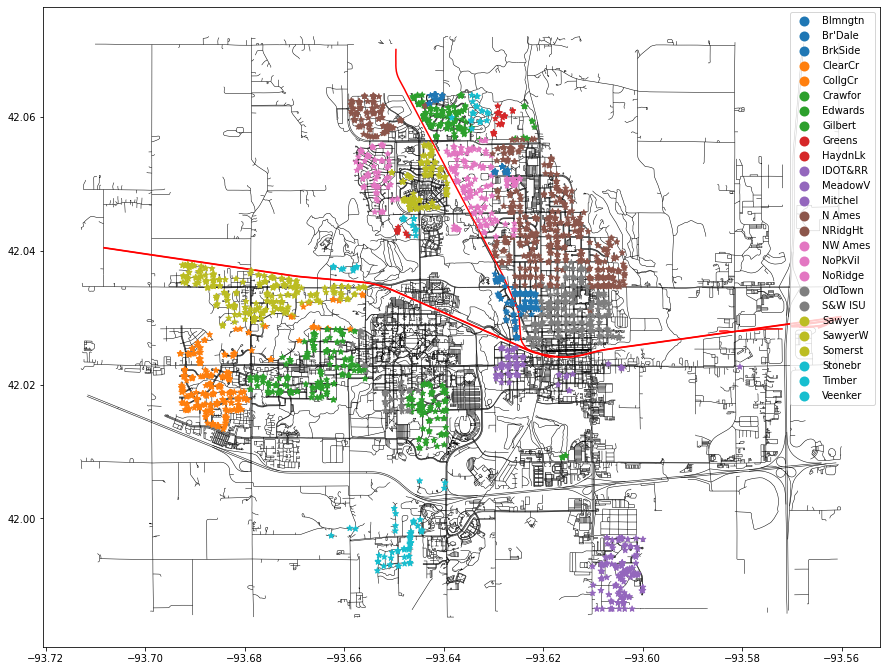

In [366]:
fig,ax = plt.subplots(figsize=(15,15))
df.plot(ax=ax, marker='*', column = 'Neighborhood_y', zorder=2, legend=True)
#waterways.plot(ax = ax, color='blue', linewidth=.3)
roads.plot(ax=ax, color='black', linewidth=0.5, zorder=1)
railways.plot(ax = ax, color='red', zorder=1)
#places.plot(ax = ax, color='purple', column='type', legend=True)
#buildings.plot(ax = ax, color='blue')
#landuse.plot(ax = ax, color='purple')
#points.plot(ax = ax, color='black')
#nwater.plot(ax=ax, color='#65bbc7', zorder=1)
#nforest.plot(ax=ax, color='green', zorder=1)
#npark.plot(ax=ax, color='#8B0000', zorder=1)
#ISU.plot(ax=ax, color = '#f47920', markersize=100, zorder=2)
# iowa_state_center.plot(ax=ax, color = '#f47920', markersize=100)
# ames_high.plot(ax=ax, color = '#f47920', markersize=100, categorical=True,
#              legend=True)

# explore neighborhood proximity

In [331]:
# split geometry into lon and lat columns
# places['lon'] = places.geometry.apply(lambda p: p.x)
# places['lat'] = places.geometry.apply(lambda p: p.y)
# places

# explore park proximity

In [332]:
npark.head()

osm_id                        name  type  \
1   44804362         Moore Memorial Park  park   
2   44806238              Brookside Park  park   
3   44806530            Ioway Creek Park  park   
4   44807182           Stuart Smith Park  park   
34  78137196  Sleepy Hollow Canoe Access  park   

                                             geometry  
1   POLYGON ((-93.64954 42.04537, -93.64954 42.045...  
2   POLYGON ((-93.63270 42.02849, -93.63212 42.028...  
3   POLYGON ((-93.62175 42.01575, -93.62203 42.015...  
4   POLYGON ((-93.63219 42.01635, -93.63173 42.016...  
34  POLYGON ((-93.62008 42.06565, -93.61995 42.065...

In [333]:
newpark = remove_empty_name(npark)

In [334]:
newpark = newpark.to_crs(4326)
ISU = ISU.to_crs(4326)

In [336]:
park_house_dist_df = newpark.geometry.apply(lambda g: df.distance(g))
park_house_dist_df.head()

0         1         2         3         4         5         6     \
1   0.023179  0.019473  0.019473  0.040770  0.037251  0.017106  0.029635   
2   0.019417  0.028516  0.028516  0.013506  0.017121  0.010010  0.038885   
3   0.026530  0.039308  0.039308  0.005076  0.020566  0.028220  0.047896   
4   0.018751  0.030171  0.030171  0.014329  0.019460  0.016501  0.039889   
34  0.055466  0.057868  0.057868  0.044236  0.029051  0.023286  0.068613   

        7         8         9         10        12        13        14    \
1   0.038410  0.019607  0.071804  0.027543  0.072755  0.041755  0.033312   
2   0.014563  0.029433  0.046118  0.035514  0.046871  0.018457  0.018953   
3   0.014466  0.048987  0.032187  0.044372  0.032821  0.016893  0.029543   
4   0.016497  0.036435  0.040250  0.036381  0.041228  0.020393  0.023917   
34  0.035018  0.018646  0.080568  0.066127  0.080877  0.035047  0.018967   

        15        16        17        18        19        20        21    \
1   0.042137  0.034031  0.038104  0.019883  0.011639  0.069386  0.035580   
2   0.053853  0.053920  0.053785  0.022628  0.009010  0.043977  0.055928   
3   0.062516  0.066761  0.064443  0.032181  0.028861  0.030248  0.069107   
4   0.054794  0.056185  0.055554  0.023679  0.016063  0.037812  0.058371   
34  0.081772  0.072676  0.077851  0.055537  0.026866  0.079072  0.073775   

        22        23        24        25        26        27        28    \
1   0.041362  0.068032  0.039204  0.022601  0.017043  0.046811  0.002916   
2   0.018771  0.041685  0.014550  0.017307  0.029027  0.037555  0.016321   
3   0.018069  0.027449  0.012857  0.034626  0.048972  0.032653  0.036194   
4   0.020763  0.036683  0.016365  0.024072  0.036085  0.028098  0.022705   
34  0.033756  0.075098  0.036839  0.015159  0.022416  0.076260  0.030919   

        29        30        31        32        33        34        35    \
1   0.016987  0.016014  0.040457  0.018600  0.017704  0.025250  0.042647   
2   0.014494  0.034379  0.016612  0.030088  0.030202  0.000142  0.022041   
3   0.032769  0.054389  0.015180  0.049929  0.050185  0.012607  0.022358   
4   0.020979  0.040913  0.018515  0.037166  0.037247  0.003090  0.024137   
34  0.019588  0.034000  0.035588  0.021389  0.023202  0.036396  0.031059   

        36        37        38        39        40        41        42    \
1   0.046508  0.044406  0.040490  0.040490  0.020165  0.023985  0.023985   
2   0.036839  0.057365  0.017060  0.017060  0.019961  0.015054  0.015054   
3   0.031584  0.066420  0.016071  0.016071  0.037917  0.031677  0.031677   
4   0.027139  0.058545  0.019003  0.019003  0.026457  0.021896  0.021896   
34  0.075577  0.084181  0.034839  0.034839  0.014378  0.017097  0.017097   

        43        44        45        46        47        48        49    \
1   0.010172  0.063474  0.063474  0.043763  0.018313  0.018313  0.035905   
2   0.028399  0.037545  0.037545  0.025114  0.037299  0.037299  0.015021   
3   0.048288  0.023599  0.023599  0.026645  0.051012  0.051012  0.018820   
4   0.034789  0.032001  0.032001  0.027451  0.039810  0.039810  0.017282   
34  0.033029  0.072285  0.072285  0.028245  0.057981  0.057981  0.030067   

        50        51        52        53        54        55        56    \
1   0.015161  0.015459  0.018171  0.031029  0.034869  0.023053  0.002825   
2   0.034232  0.026572  0.025581  0.007391  0.012369  0.019349  0.017843   
3   0.054166  0.046477  0.036395  0.014041  0.016064  0.026540  0.037735   
4   0.040670  0.033643  0.027207  0.009529  0.014480  0.018731  0.024247   
34  0.035010  0.021610  0.055819  0.033926  0.032291  0.055359  0.030812   

        57        58        59        60        61        62        63    \
1   0.015455  0.042494  0.014434  0.009656  0.017040  0.027069  0.004227   
2   0.021097  0.053134  0.023251  0.025183  0.036004  0.009766  0.025560   
3   0.040384  0.061246  0.035358  0.039441  0.055980  0.022713  0.044756   
4   0.027974  0.053776  0.025114  0.027750  0.04

In [337]:
for i, row in df.iterrows():
    df.at[i,'nearest_park'] = park_house_dist_df[i].min()

In [338]:
df.head()

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
0           1  909176150        856     126000          30       RL   
1           2  905476230       1049     139500         120       RL   
2           2  905476230       1049     139500         120       RL   
3           3  911128020       1001     124900          30  C (all)   
4           4  535377150       1039     114000          70       RL   

   LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig  \
0          NaN     7890   Pave   NaN      Reg         Lvl    AllPub    Corner   
1         42.0     4235   Pave   NaN      Reg         Lvl    AllPub    Inside   
2         42.0     4235   Pave   NaN      Reg         Lvl    AllPub    Inside   
3         60.0     6060   Pave   NaN      Reg         Lvl    AllPub    Inside   
4         80.0     8146   Pave   NaN      Reg         Lvl    AllPub    Corner   

  LandSlope Neighborhood_x Condition1 Condition2 BldgType HouseStyle  \
0       Gtl          SWISU       Norm       Norm     1Fam     1Story   
1       Gtl        Edwards       Norm       Norm   TwnhsE     1Story   
2       Gtl        Edwards       Norm       Norm   TwnhsE     1Story   
3       Gtl         IDOTRR       Norm       Norm     1Fam     1Story   
4       Gtl        OldTown       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            6            6       1939          1950     Gable  CompShg   
1            5            5       1984          1984     Gable  CompShg   
2            5            5       1984          1984     Gable  CompShg   
3            5            9       1930          2007       Hip  CompShg   
4            4            8       1900          2003     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Wd Sdng     Wd Sdng       None         0.0        TA        TA   
1     HdBoard     HdBoard    BrkFace       149.0        Gd        TA   
2     HdBoard     HdBoard    BrkFace       149.0        Gd        TA   
3     MetalSd     MetalSd       None         0.0        Gd        TA   
4     MetalSd     MetalSd       None         0.0        Gd        Gd   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       TA       TA           No          Rec       238.0   
1     CBlock       Gd       TA           Mn          GLQ       552.0   
2     CBlock       Gd       TA           Mn          GLQ       552.0   
3     BrkTil       TA       TA           No          ALQ       737.0   
4     BrkTil       Fa       TA           No          Unf         0.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      618.0        856.0    GasA        TA   
1          ALQ       393.0      104.0       1049.0    GasA        TA   
2          ALQ       393.0      104.0       1049.0    GasA        TA   
3          Unf         0.0      100.0        837.0    GasA        Ex   
4          Unf         0.0      405.0        405.0    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
0          Y      SBrkr       856         0             0           1.0   
1          Y      SBrkr      1049         0             0           1.0   
2          Y      SBrkr      1049         0             0           1.0   
3          Y      SBrkr      1001         0             0           0.0   
4          Y      SBrkr       717       322             0           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0           0.0         1         0             2             1          TA   
1           0.0         2         0             2             1          Gd   
2           0.0         2         0             2             1          Gd   
3           0.0         1         0             2             1          Gd   
4           0.0         1         0             2           

Text(0.5, 1.0, 'sale price against distance to nearest park')

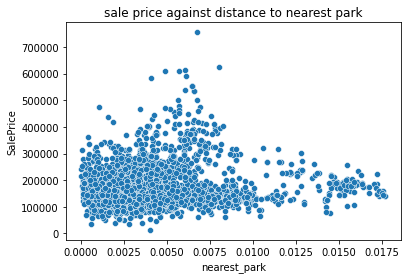

In [339]:
import seaborn as sns
x = sns.scatterplot(x=df.nearest_park, y=df.SalePrice)
x.set_title('sale price against distance to nearest park')

Quick thoughts on my work so far:

This entire notebook has been focused on using geopandas for both visualizations and feature engineering.  The features I was most excited about was 1. distance to nearest park and 2. neighborhood.  First I had to find the coordinates for each house using geocode.  This led to several errors, and about 100 houses were removed from this df because they were either missing or outside of the bounds of the map (either a null or an error).  With the remaining houses, I graphed their sale price with distance to nearest park.  The above graph shows very little impact on saleprice by park proximity.  My next venture with park proximity will be to narrow it down to proximity to particular parks, possibly only parks over a certain size.  The next concern here will be likely multicolinearity with the neighborhood feature.  Proximity to certain parks may just be another way of saying, 'is in x neighborhood'.  



# Stream proximity

In [371]:
streams = waterways[waterways['type'] == 'stream']

In [372]:
streams_dist = streams.geometry.apply(lambda g: df.distance(g))
streams_dist.head()

0         1         2         3         4         5         6     \
1  0.098837  0.106320  0.106320  0.067796  0.055696  0.069166  0.117261   
2  0.031998  0.045535  0.045535  0.023348  0.038668  0.044226  0.051270   
3  0.008365  0.019070  0.019070  0.027514  0.031407  0.021244  0.028729   
4  0.040086  0.028489  0.028489  0.077644  0.081428  0.064826  0.018715   
5  0.019460  0.022012  0.022012  0.049330  0.059663  0.051816  0.017233   

       7         8         9         10        12        13        14    \
1  0.059959  0.073962  0.091974  0.114137  0.091407  0.056518  0.053569   
2  0.032713  0.064598  0.025691  0.047982  0.026927  0.035203  0.046940   
3  0.029276  0.037747  0.054254  0.025250  0.055289  0.033164  0.033320   
4  0.079955  0.066191  0.094121  0.022240  0.095505  0.083826  0.080692   
5  0.055593  0.064979  0.055885  0.016203  0.057325  0.059266  0.063615   

       15        16        17        18        19        20        21    \
1  0.131823  0.126243  0.129692  0.101613  0.074686  0.092056  0.127652   
2  0.064359  0.073143  0.068407  0.038365  0.044211  0.022998  0.075661   
3  0.043695  0.046134  0.044497  0.012415  0.018225  0.051745  0.048457   
4  0.005537  0.015489  0.005212  0.034844  0.059316  0.091360  0.016893   
5  0.017402  0.036348  0.025965  0.021304  0.048011  0.053157  0.038560   

       22        23        24        25        26        27        28    \
1  0.055619  0.086318  0.060984  0.062717  0.077677  0.112315  0.082612   
2  0.036392  0.023750  0.031160  0.050877  0.064233  0.025846  0.050287   
3  0.033422  0.050890  0.029253  0.029505  0.036500  0.028689  0.021301   
4  0.083999  0.093051  0.079987  0.071608  0.062538  0.048170  0.052106   
5  0.059996  0.055704  0.054803  0.060088  0.062556  0.008773  0.047108   

       29        30        31        32        33        34        35    \
1  0.068339  0.089318  0.058459  0.076717  0.078520  0.072569  0.051561   
2  0.048781  0.068374  0.033503  0.065311  0.065390  0.028779  0.040679   
3  0.025036  0.038906  0.031333  0.037811  0.037505  0.014479  0.036472   
4  0.065918  0.053954  0.082030  0.064065  0.062429  0.065062  0.086730   
5  0.055244  0.059126  0.057291  0.064140  0.063089  0.043120  0.063876   

       36        37        38        39        40        41        42    \
1  0.111276  0.134885  0.057672  0.057672  0.065705  0.061600  0.061600   
2  0.024668  0.068425  0.034395  0.034395  0.054046  0.047983  0.047983   
3  0.028181  0.047380  0.031765  0.031765  0.030558  0.028215  0.028215   
4  0.048999  0.002607  0.082425  0.082425  0.069416  0.072419  0.072419   
5  0.009656  0.020649  0.057998  0.057998  0.060576  0.058966  0.058966   

       43        44        45        46        47        48        49    \
1  0.087804  0.086592  0.086592  0.047787  0.110386  0.110386  0.057891   
2  0.062115  0.018712  0.018712  0.044969  0.059100  0.059100  0.036775   
3  0.032615  0.046139  0.046139  0.039367  0.030355  0.030355  0.029335   
4  0.051426  0.088034  0.088034  0.089130  0.024824  0.024824  0.079503   
5  0.053876  0.050859  0.050859  0.067551  0.033383  0.033383  0.057465   

       50        51        52        53        54        55        56    \
1  0.090298  0.076611  0.103648  0.065653  0.060847  0.098771  0.083079   
2  0.067979  0.061791  0.043042  0.030952  0.033824  0.032070  0.051810   
3  0.038412  0.034264  0.016097  0.021899  0.026848  0.008301  0.022743   
4  0.052681  0.062217  0.031423  0.072443  0.077295  0.040081  0.051987   
5  0.058076  0.060942  0.022591  0.049723  0.054491  0.019574  0.048092   

       57        58        59        60        61        62        63    \
1  0.071573  0.131485  0.100460  0.099466  0.090683  0.062396  0.090562   
2  0.056110  0.062662  0.043412  0.049023  0.069861  0.039366  0.057764   
3  0.030130  0.042788  0.014698  0.019059  0.040315  0.024124  0.027747   
4  0.064536  0.007823  0.034011  0.034582  0.053699  0.072544  0.046372   
5  0.058816  0.015075  0

In [373]:
for i, row in df.iterrows():
    df.at[i,'nearest_stream'] = streams_dist[i].min()

Text(0.5, 1.0, 'sale price against distance to nearest stream')

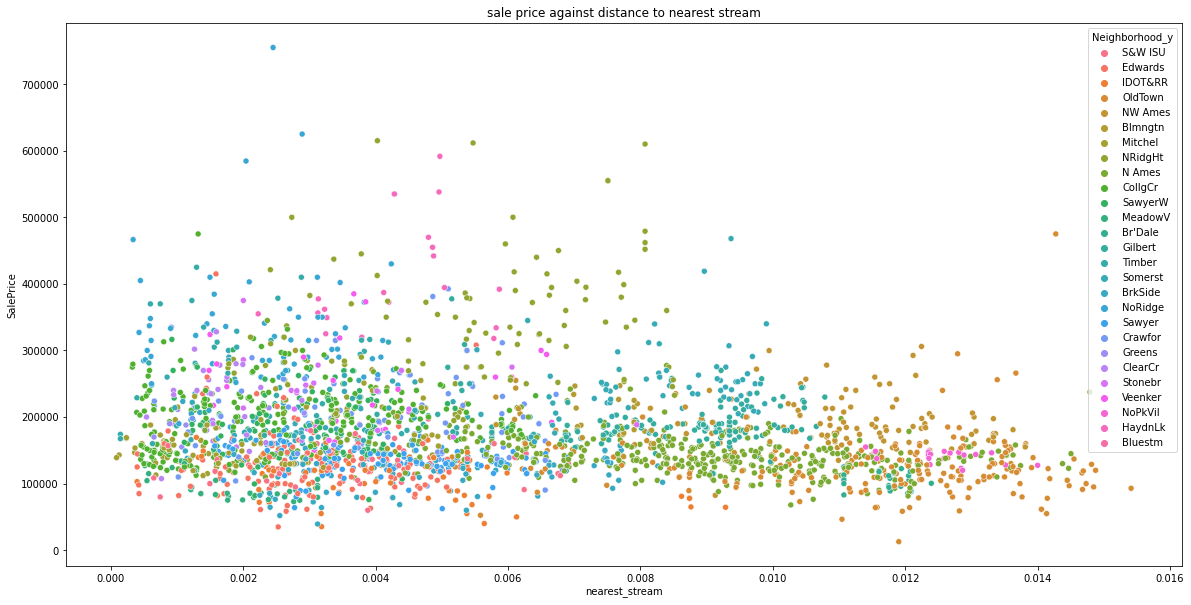

In [377]:
f, ax = plt.subplots(figsize=(20, 10))
x = sns.scatterplot(x=df.nearest_stream, y=df.SalePrice, hue=test['Neighborhood_y'])
#plt.xlim(0, .01)
x.set_title('sale price against distance to nearest stream')


# ISU proximity

In [340]:
ISU_dist_df = ISU.geometry.apply(lambda g: df.distance(g))
ISU_dist_df

0        1        2         3         4         5         6     \
0  0.013506  0.01966  0.01966  0.031875  0.033329  0.019325  0.030372   

       7         8         9         10        12        13        14    \
0  0.032202  0.033245  0.060009  0.027143  0.061029  0.036006  0.033494   

       15        16        17        18        19        20        21    \
0  0.045219  0.044819  0.044687  0.014631  0.015101  0.057513  0.046982   

       22        23        24        25        26        27        28    \
0  0.036067  0.056562  0.032471  0.027486  0.031645  0.035707  0.016106   

       29       30        31        32       33        34        35    \
0  0.022394  0.03341  0.034306  0.033037  0.03257  0.017384  0.038644   

       36        37        38        39       40        41        42    \
0  0.035245  0.048597  0.034613  0.034613  0.02766  0.026882  0.026882   

      43        44        45        46        47        48        49    \
0  0.02712  0.051848  0.051848  0.041063  0.028402  0.028402  0.031415   

       50        51        52        53        54        55        56    \
0  0.032887  0.029537  0.016812  0.024573  0.029306  0.013398  0.017485   

       57        58        59        60        61        62        63    \
0  0.026205  0.044661  0.014141  0.016347  0.034795  0.024749  0.022397   

       64        65        66       67        68       69        70    \
0  0.018242  0.019092  0.023326  0.01747  0.032831  0.04406  0.030747   

       71        73       74        75        76        77        78    \
0  0.043129  0.011313  0.02594  0.029933  0.021143  0.049411  0.035818   

       79        80       82        83        85        86        87    \
0  0.034028  0.032025  0.02952  0.027599  0.055492  0.039359  0.031407   

       88        89        90        91        92        93        94    \
0  0.026802  0.020709  0.021514  0.028088  0.019539  0.020064  0.030859   

       95        96        97        98        99        100       101   \
0  0.021968  0.031025  0.012509  0.022823  0.016104  0.031307  0.038305   

       102       103       104       105       106       107       108   \
0  0.056267  0.033533  0.013588  0.038578  0.053527  0.033602  0.023102   

       109      110       111       112       113       115       116   \
0  0.034553  0.02424  0.056504  0.056145  0.032794  0.014166  0.017111   

       117       118       119       120       121       122       123   \
0  0.024164  0.023979  0.023076  0.032979  0.036326  0.033221  0.011764   

       124       125       126       127       128       129       130   \
0  0.027392  0.028167  0.054049  0.046977  0.018265  0.042399  0.029607   

       131       132      133       134       135       136      137   \
0  0.017292  0.029265  0.03679  0.044772  0.034743  0.019277  0.02987   

       138       139       140       141       142       143       144   \
0  0.013757  0.045188  0.046769  0.017434  0.031472  0.033808  0.023938   

      145      146       147       148       149       150       151   \
0  0.03314  0.04858  0.025495  0.037293  0.029218  0.046613  0.033715   

       152       153       154       155       156       158       159   \
0  0.024411  0.044684  0.012503  0.033281  0.029522  0.015014  0.027081   

       160       161      162       163       164       165       166   \
0  0.021179  0.032456  0.04157  0.014897  0.033029  0.019031  0.045791   

       167       168       169       170       171       172       173   \
0  0.017326  0.033453  0.039553  0.026122  0.031965  0.020505  0.030489   

       174       175       176       177       179       180       181   \
0  0.028955  0.031003  0.020829  0.041347  0.028271  0.023068  0.037291   

       182       183       184       185       186       187       188   \
0  0.023647  0.025574  0.043735  0.026746  0.019261  0.031376  0.031145   

       189       190       191       192       193       194       195   \
0  0.022138  0.022515  0.022122  0.029

In [341]:
for i, row in df.iterrows():
    df.at[i,'ISU_distance'] = park_house_dist_df[i].min()

In [342]:
df.head()

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
0           1  909176150        856     126000          30       RL   
1           2  905476230       1049     139500         120       RL   
2           2  905476230       1049     139500         120       RL   
3           3  911128020       1001     124900          30  C (all)   
4           4  535377150       1039     114000          70       RL   

   LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig  \
0          NaN     7890   Pave   NaN      Reg         Lvl    AllPub    Corner   
1         42.0     4235   Pave   NaN      Reg         Lvl    AllPub    Inside   
2         42.0     4235   Pave   NaN      Reg         Lvl    AllPub    Inside   
3         60.0     6060   Pave   NaN      Reg         Lvl    AllPub    Inside   
4         80.0     8146   Pave   NaN      Reg         Lvl    AllPub    Corner   

  LandSlope Neighborhood_x Condition1 Condition2 BldgType HouseStyle  \
0       Gtl          SWISU       Norm       Norm     1Fam     1Story   
1       Gtl        Edwards       Norm       Norm   TwnhsE     1Story   
2       Gtl        Edwards       Norm       Norm   TwnhsE     1Story   
3       Gtl         IDOTRR       Norm       Norm     1Fam     1Story   
4       Gtl        OldTown       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            6            6       1939          1950     Gable  CompShg   
1            5            5       1984          1984     Gable  CompShg   
2            5            5       1984          1984     Gable  CompShg   
3            5            9       1930          2007       Hip  CompShg   
4            4            8       1900          2003     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Wd Sdng     Wd Sdng       None         0.0        TA        TA   
1     HdBoard     HdBoard    BrkFace       149.0        Gd        TA   
2     HdBoard     HdBoard    BrkFace       149.0        Gd        TA   
3     MetalSd     MetalSd       None         0.0        Gd        TA   
4     MetalSd     MetalSd       None         0.0        Gd        Gd   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       TA       TA           No          Rec       238.0   
1     CBlock       Gd       TA           Mn          GLQ       552.0   
2     CBlock       Gd       TA           Mn          GLQ       552.0   
3     BrkTil       TA       TA           No          ALQ       737.0   
4     BrkTil       Fa       TA           No          Unf         0.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      618.0        856.0    GasA        TA   
1          ALQ       393.0      104.0       1049.0    GasA        TA   
2          ALQ       393.0      104.0       1049.0    GasA        TA   
3          Unf         0.0      100.0        837.0    GasA        Ex   
4          Unf         0.0      405.0        405.0    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
0          Y      SBrkr       856         0             0           1.0   
1          Y      SBrkr      1049         0             0           1.0   
2          Y      SBrkr      1049         0             0           1.0   
3          Y      SBrkr      1001         0             0           0.0   
4          Y      SBrkr       717       322             0           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0           0.0         1         0             2             1          TA   
1           0.0         2         0             2             1          Gd   
2           0.0         2         0             2             1          Gd   
3           0.0         1         0             2             1          Gd   
4           0.0         1         0             2           

Text(0.5, 1.0, 'sale price against distance to ISU')

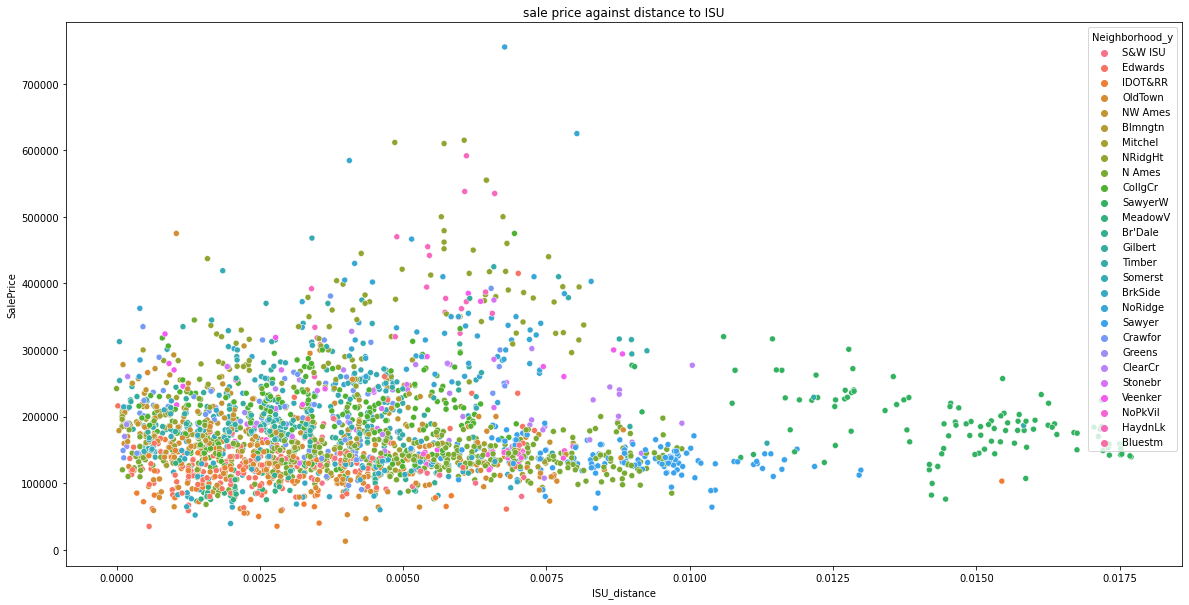

In [343]:
f, ax = plt.subplots(figsize=(20, 10))
x = sns.scatterplot(x=df.ISU_distance, y=df.SalePrice, hue=test['Neighborhood_y'])
#plt.xlim(0, .01)
x.set_title('sale price against distance to ISU')


Text(0.5, 1.0, 'sale price against longitude')

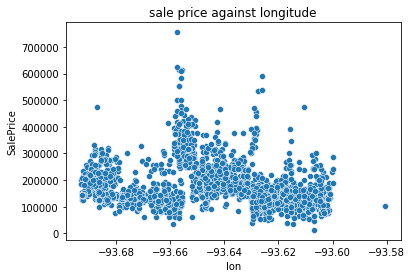

In [344]:
x = sns.scatterplot(x=df.lon, y=df.SalePrice)
x.set_title('sale price against longitude')

Text(0.5, 1.0, 'sale price against latitude')

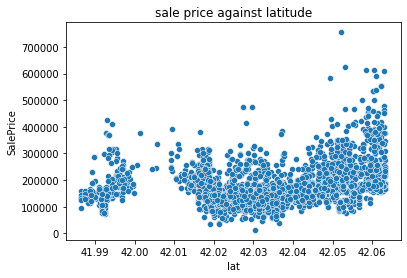

In [345]:
x = sns.scatterplot(x=df.lat, y=df.SalePrice)
x.set_title('sale price against latitude')

# limit search to only large parks

In [346]:
newpark["area"] = newpark['geometry'].area
newpark.sort_values('area', ascending=False)
largepark = newpark.sort_values('area', ascending=False).head(5)
largepark

osm_id                      name  type  \
2     44806238            Brookside Park  park   
4     44807182         Stuart Smith Park  park   
413  921759082  Izaak Walton League Park  park   
1     44804362       Moore Memorial Park  park   
65   188427943   North River Valley Park  park   

                                              geometry      area  
2    POLYGON ((-93.63270 42.02849, -93.63212 42.028...  0.000042  
4    POLYGON ((-93.63219 42.01635, -93.63173 42.016...  0.000038  
413  POLYGON ((-93.59520 42.04553, -93.58620 42.045...  0.000033  
1    POLYGON ((-93.64954 42.04537, -93.64954 42.045...  0.000022  
65   POLYGON ((-93.59717 42.03713, -93.59710 42.037...  0.000021

In [347]:
large_park_house_dist_df = largepark.geometry.apply(lambda g: df.distance(g))
large_park_house_dist_df

0         1         2         3         4         5         6     \
2    0.019417  0.028516  0.028516  0.013506  0.017121  0.010010  0.038885   
4    0.018751  0.030171  0.030171  0.014329  0.019460  0.016501  0.039889   
413  0.062286  0.071509  0.071509  0.028569  0.018828  0.036633  0.082166   
1    0.023179  0.019473  0.019473  0.040770  0.037251  0.017106  0.029635   
65   0.050939  0.061194  0.061194  0.016900  0.008937  0.029237  0.071447   

         7         8         9         10        12        13        14    \
2    0.014563  0.029433  0.046118  0.035514  0.046871  0.018457  0.018953   
4    0.016497  0.036435  0.040250  0.036381  0.041228  0.020393  0.023917   
413  0.021520  0.049652  0.056014  0.078851  0.055768  0.017769  0.020568   
1    0.038410  0.019607  0.071804  0.027543  0.072755  0.041755  0.033312   
65   0.009904  0.045767  0.048035  0.068020  0.048020  0.006032  0.015175   

         15        16        17        18        19        20        21    \
2    0.053853  0.053920  0.053785  0.022628  0.009010  0.043977  0.055928   
4    0.054794  0.056185  0.055554  0.023679  0.016063  0.037812  0.058371   
413  0.097065  0.094500  0.096158  0.066010  0.042139  0.055518  0.096280   
1    0.042137  0.034031  0.038104  0.019883  0.011639  0.069386  0.035580   
65   0.086435  0.085947  0.086412  0.055105  0.034383  0.047093  0.087876   

         22        23        24        25        26        27        28    \
2    0.018771  0.041685  0.014550  0.017307  0.029027  0.037555  0.016321   
4    0.020763  0.036683  0.016365  0.024072  0.036085  0.028098  0.022705   
413  0.017121  0.050166  0.022228  0.032983  0.052536  0.073395  0.051540   
1    0.041362  0.068032  0.039204  0.022601  0.017043  0.046811  0.002916   
65   0.005680  0.042239  0.010416  0.027803  0.048066  0.061555  0.044181   

         29        30        31        32        33        34        35    \
2    0.014494  0.034379  0.016612  0.030088  0.030202  0.000142  0.022041   
4    0.020979  0.040913  0.018515  0.037166  0.037247  0.003090  0.024137   
413  0.037610  0.063604  0.019745  0.052224  0.053724  0.035721  0.013706   
1    0.016987  0.016014  0.040457  0.018600  0.017704  0.025250  0.042647   
65   0.031298  0.058313  0.007985  0.048074  0.049339  0.024640  0.003490   

         36        37        38        39        40        41        42    \
2    0.036839  0.057365  0.017060  0.017060  0.019961  0.015054  0.015054   
4    0.027139  0.058545  0.019003  0.019003  0.026457  0.021896  0.021896   
413  0.072326  0.100441  0.019063  0.019063  0.037452  0.030381  0.030381   
1    0.046508  0.044406  0.040490  0.040490  0.020165  0.023985  0.023985   
65   0.060490  0.090005  0.007398  0.007398  0.032638  0.024544  0.024544   

         43        44        45        46        47        48        49    \
2    0.028399  0.037545  0.037545  0.025114  0.037299  0.037299  0.015021   
4    0.034789  0.032001  0.032001  0.027451  0.039810  0.039810  0.017282   
413  0.060056  0.049372  0.049372  0.010851  0.077977  0.077977  0.020889   
1    0.010172  0.063474  0.063474  0.043763  0.018313  0.018313  0.035905   
65   0.053991  0.040546  0.040546  0.003638  0.069320  0.069320  0.010607   

         50        51        52        53        54        55        56    \
2    0.034232  0.026572  0.025581  0.007391  0.012369  0.019349  0.017843   
4    0.040670  0.033643  0.027207  0.009529  0.014480  0.018731  0.024247   
413  0.064236  0.050601  0.068662  0.028333  0.023356  0.062241  0.052452   
1    0.015161  0.015459  0.018171  0.031029  0.034869  0.023053  0.002825   
65   0.058766  0.045846  0.058255  0.017237  0.012424  0.050902  0.045289   

         57        58        59        60        61        62        63    \
2    0.021097  0.053134  0.023251  0.025183  0.036004  0.009766  0.025560   
4    0.027974  0.053776  0.025114  0.027750  0.042492  0.014913  0.031309   
413  0.043784  0.096450  0.065866  0.066187  0.065253  0.027412  0.060894 

In [348]:
for i, row in df.iterrows():
    df.at[i,'nearest_large_park'] = large_park_house_dist_df[i].min()

In [350]:
df.head()

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
0           1  909176150        856     126000          30       RL   
1           2  905476230       1049     139500         120       RL   
2           2  905476230       1049     139500         120       RL   
3           3  911128020       1001     124900          30  C (all)   
4           4  535377150       1039     114000          70       RL   

   LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig  \
0          NaN     7890   Pave   NaN      Reg         Lvl    AllPub    Corner   
1         42.0     4235   Pave   NaN      Reg         Lvl    AllPub    Inside   
2         42.0     4235   Pave   NaN      Reg         Lvl    AllPub    Inside   
3         60.0     6060   Pave   NaN      Reg         Lvl    AllPub    Inside   
4         80.0     8146   Pave   NaN      Reg         Lvl    AllPub    Corner   

  LandSlope Neighborhood_x Condition1 Condition2 BldgType HouseStyle  \
0       Gtl          SWISU       Norm       Norm     1Fam     1Story   
1       Gtl        Edwards       Norm       Norm   TwnhsE     1Story   
2       Gtl        Edwards       Norm       Norm   TwnhsE     1Story   
3       Gtl         IDOTRR       Norm       Norm     1Fam     1Story   
4       Gtl        OldTown       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            6            6       1939          1950     Gable  CompShg   
1            5            5       1984          1984     Gable  CompShg   
2            5            5       1984          1984     Gable  CompShg   
3            5            9       1930          2007       Hip  CompShg   
4            4            8       1900          2003     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     Wd Sdng     Wd Sdng       None         0.0        TA        TA   
1     HdBoard     HdBoard    BrkFace       149.0        Gd        TA   
2     HdBoard     HdBoard    BrkFace       149.0        Gd        TA   
3     MetalSd     MetalSd       None         0.0        Gd        TA   
4     MetalSd     MetalSd       None         0.0        Gd        Gd   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       TA       TA           No          Rec       238.0   
1     CBlock       Gd       TA           Mn          GLQ       552.0   
2     CBlock       Gd       TA           Mn          GLQ       552.0   
3     BrkTil       TA       TA           No          ALQ       737.0   
4     BrkTil       Fa       TA           No          Unf         0.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      618.0        856.0    GasA        TA   
1          ALQ       393.0      104.0       1049.0    GasA        TA   
2          ALQ       393.0      104.0       1049.0    GasA        TA   
3          Unf         0.0      100.0        837.0    GasA        Ex   
4          Unf         0.0      405.0        405.0    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
0          Y      SBrkr       856         0             0           1.0   
1          Y      SBrkr      1049         0             0           1.0   
2          Y      SBrkr      1049         0             0           1.0   
3          Y      SBrkr      1001         0             0           0.0   
4          Y      SBrkr       717       322             0           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0           0.0         1         0             2             1          TA   
1           0.0         2         0             2             1          Gd   
2           0.0         2         0             2             1          Gd   
3           0.0         1         0             2             1          Gd   
4           0.0         1         0             2           

Text(0.5, 1.0, 'sale price against distance to nearest large park')

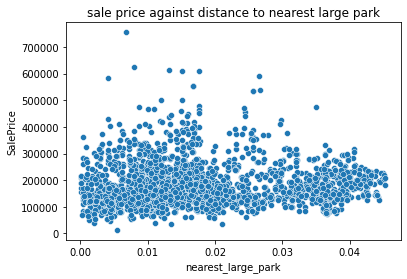

In [351]:
x = sns.scatterplot(df.nearest_large_park, df.SalePrice)
x.set_title('sale price against distance to nearest large park')

# explore by neighborhood

In [378]:
# define neighborhoods
ontario = places[places['name'] == 'Ontario']
somerset = places[places['name'] == 'Somerset']
frederiksen = places[places['name'] == 'Frederiksen Court']
uniondrive = places[places['name'] == 'Union Drive']
richardson = places[places['name'] == 'Richardson Court']

<AxesSubplot:>

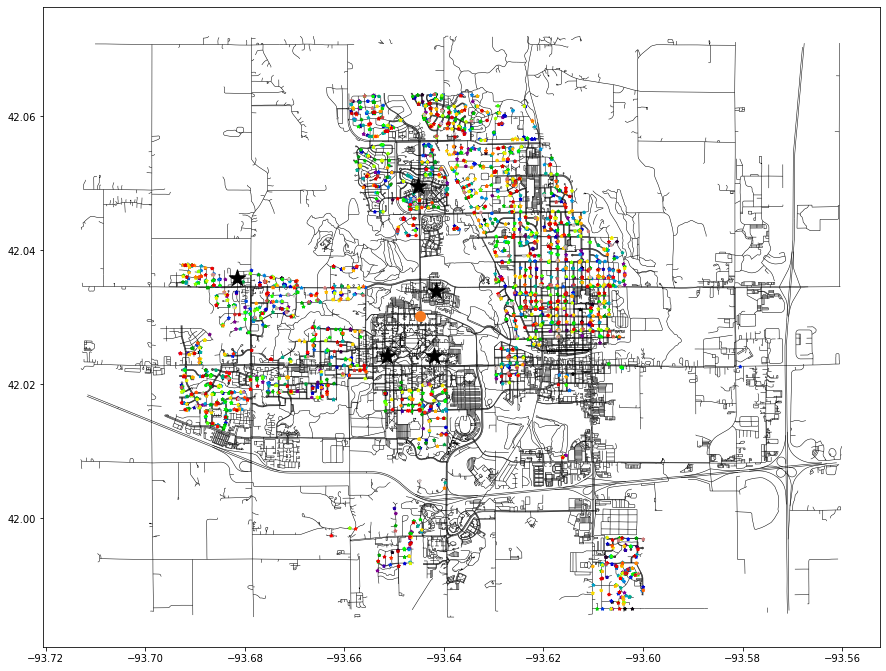

In [386]:
# first trying with coloring by neighborhood
fig,ax = plt.subplots(figsize=(15,12))
df.plot(ax=ax, marker='*', zorder=2, legend=True, cmap="nipy_spectral", markersize=10)
ontario.plot(ax=ax, marker='*', zorder=2, legend=True, cmap="nipy_spectral", markersize=300)
somerset.plot(ax=ax, marker='*', zorder=2, legend=True, cmap="nipy_spectral", markersize=300)
frederiksen.plot(ax=ax, marker='*', zorder=2, legend=True, cmap="nipy_spectral", markersize=300)
uniondrive.plot(ax=ax, marker='*', zorder=2, legend=True, cmap="nipy_spectral", markersize=300)
richardson.plot(ax=ax, marker='*', zorder=2, legend=True, cmap="nipy_spectral", markersize=300)
#waterways.plot(ax = ax, color='blue', linewidth=.3)
roads.plot(ax=ax, color='black', linewidth=0.5, zorder=1)
#railways.plot(ax = ax, color='red', zorder=1)
#places.plot(ax = ax, color='purple', column='type', legend=True)
#buildings.plot(ax = ax, color='blue')
#landuse.plot(ax = ax, color='purple')
#points.plot(ax = ax, color='black')
#nwater.plot(ax=ax, color='#65bbc7', zorder=1)
#nforest.plot(ax=ax, color='green', zorder=1)
#npark.plot(ax=ax, color='#8B0000', zorder=1)
ISU.plot(ax=ax, color = '#f47920', markersize=100, zorder=2)
# iowa_state_center.plot(ax=ax, color = '#f47920', markersize=100)
# ames_high.plot(ax=ax, color = '#f47920', markersize=100, categorical=True,
#              legend=True)

# explore by yearbuilt

<AxesSubplot:>

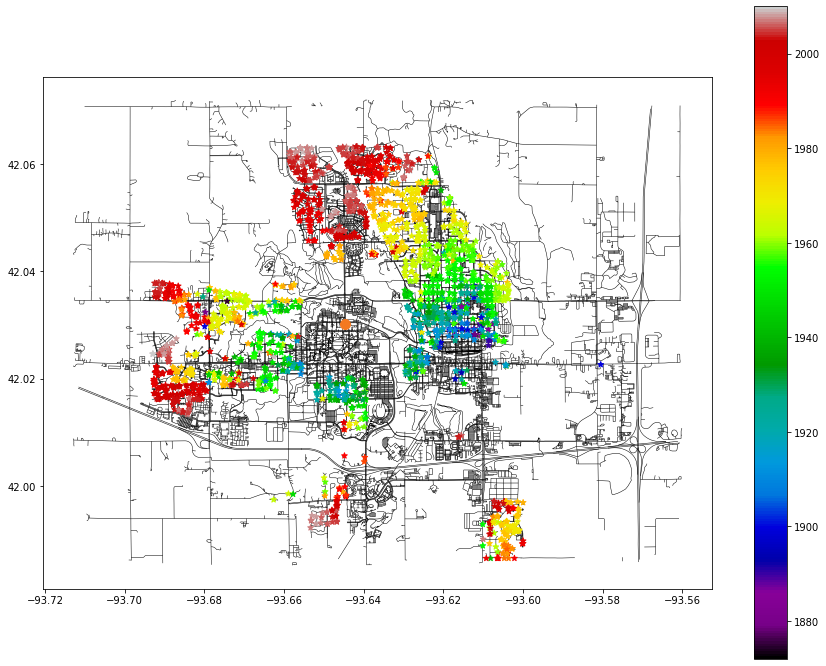

In [361]:
# first trying with coloring by neighborhood
fig,ax = plt.subplots(figsize=(15,12))
df.plot(ax=ax, marker='*', zorder=2, column='YearBuilt', legend=True, cmap="nipy_spectral")
#waterways.plot(ax = ax, color='blue', linewidth=.3)
roads.plot(ax=ax, color='black', linewidth=0.5, zorder=1)
#railways.plot(ax = ax, color='red', zorder=1)
#places.plot(ax = ax, color='purple', column='type', legend=True)
#buildings.plot(ax = ax, color='blue')
#landuse.plot(ax = ax, color='purple')
#points.plot(ax = ax, color='black')
#nwater.plot(ax=ax, color='#65bbc7', zorder=1)
#nforest.plot(ax=ax, color='green', zorder=1)
#npark.plot(ax=ax, color='#8B0000', zorder=1)
ISU.plot(ax=ax, color = '#f47920', markersize=100, zorder=2)
# iowa_state_center.plot(ax=ax, color = '#f47920', markersize=100)
# ames_high.plot(ax=ax, color = '#f47920', markersize=100, categorical=True,
#              legend=True)

# explore by .....

<AxesSubplot:>

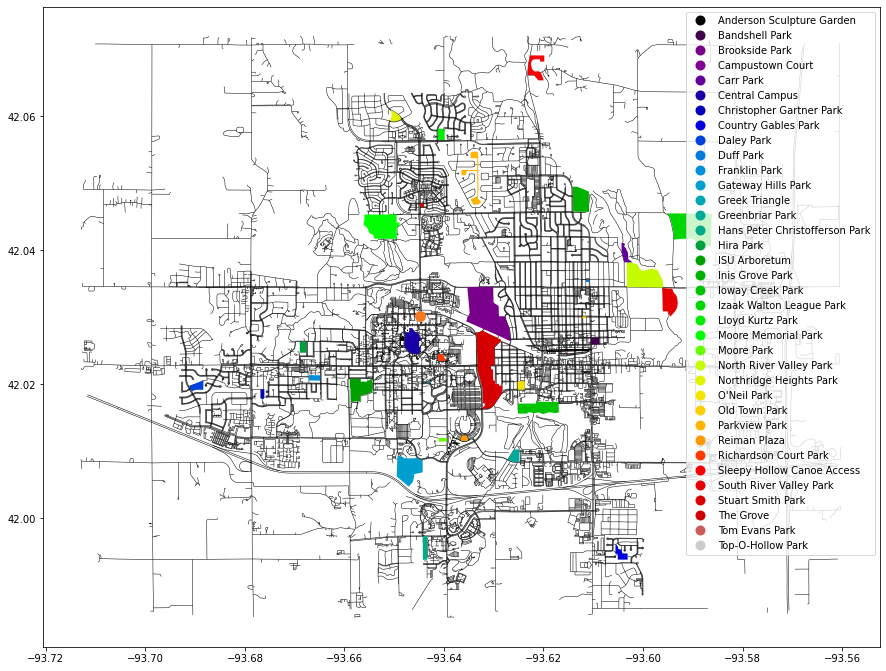

In [407]:
# first trying with coloring by neighborhood
fig,ax = plt.subplots(figsize=(15,12))
#df.plot(ax=ax, marker='*', zorder=2, column='YearBuilt', legend=True, cmap="nipy_spectral")
#landuse.plot(ax=ax, marker='*', zorder=2, column='type', legend=True, cmap="nipy_spectral")
#waterways.plot(ax = ax, color='blue', linewidth=.3)
roads.plot(ax=ax, color='black', linewidth=0.5, zorder=1)
#railways.plot(ax = ax, color='red', zorder=1)
#places.plot(ax = ax, color='purple', column='type', legend=True)
#buildings.plot(ax = ax, color='blue')
#landuse.plot(ax = ax, color='purple')
#points.plot(ax = ax, color='black')
#nwater.plot(ax=ax, color='#65bbc7', zorder=1)
#nforest.plot(ax=ax, color='green', zorder=1)
npark.plot(ax=ax, zorder=1, column='name', cmap="nipy_spectral", legend=True)
ISU.plot(ax=ax, color = '#f47920', markersize=100, zorder=2)
# iowa_state_center.plot(ax=ax, color = '#f47920', markersize=100)
# ames_high.plot(ax=ax, color = '#f47920', markersize=100, categorical=True,
#              legend=True)

In [403]:
npark

osm_id                            name  type  \
1     44804362             Moore Memorial Park  park   
2     44806238                  Brookside Park  park   
3     44806530                Ioway Creek Park  park   
4     44807182               Stuart Smith Park  park   
34    78137196      Sleepy Hollow Canoe Access  park   
36    92282284                  Bandshell Park  park   
42   183766534                   ISU Arboretum  park   
51   183884545             Country Gables Park  park   
52   183898439                       Duff Park  park   
54   183932725                     O'Neil Park  park   
60   188266016                      Moore Park  park   
61   188287596                      Daley Park  park   
64   188427371         South River Valley Park  park   
65   188427943         North River Valley Park  park   
66   188428463                       Carr Park  park   
67   188428825                 Inis Grove Park  park   
68   188430128                  Tom Evans Park  park   
73   243723674                            None  park   
76   243723680                       The Grove  park   
77   244378669                            None  park   
78   244378670                            None  park   
86   256860737                   Old Town Park  park   
87   260815731              Gateway Hills Park  park   
89   260923828                 Greenbriar Park  park   
90   261599821                Lloyd Kurtz Park  park   
92   265534872               Top-O-Hollow Park  park   
94   295015422                   Franklin Park  park   
95   468443476         Northridge Heights Park  park   
96   486943973                  Central Campus  park   
97   486944924           Richardson Court Park  park   
98   487056980                            None  park   
99   487255808        Christopher Gartner Park  park   
101  585989080                            None  park   
120  840743131                    Reiman Plaza  park   
121  845202104       Anderson Sculpture Garden  park   
124  845848098                  Greek Triangle  park   
125  845866497                            None  park   
150  853550300                            None  park   
195  881509633  Hans Peter Christofferson Park  park   
211  885635112                   Parkview Park  park   
212  885657121                            None  park   
251  918026905                       Hira Park  park   
406  919933059                Campustown Court  park   
413  921759082        Izaak Walton League Park  park   
416  927852534                            None  park   

                                              geometry  
1    POLYGON ((-93.64954 42.04537, -93.64954 42.045...  
2    POLYGON ((-93.63270 42.02849, -93.63212 42.028...  
3    POLYGON ((-93.62175 42.01575, -93.62203 42.015...  
4    POLYGON ((-93.63219 42.01635, -93.63173 42.016...  
34   POLYGON ((-93.62008 42.06565, -93.61995 42.065...  
36   POLYGON ((-93.61046 42.02699, -93.61045 42.026...  
42   POLYGON ((-93.65436 42.02078, -93.65434 42.019...  
51   POLYGON ((-93.60554 41.99616, -93.60554 41.994...  
52   POLYGON ((-93.61148 42.03565, -93.61148 42.035...  
54   POLYGON ((-93.62520 42.02047, -93.62520 42.020...  
60   POLYGON ((-93.63940 42.01148, -93.64106 42.011...  
61   POLYGON ((-93.68833 42.02063, -93.68836 42.019...  
64   POLYGON ((-93.59603 42.03090, -93.59503 42.030...  
65   POLYGON ((-93.59717 42.03713, -93.59710 42.037...  
66   POLYGON ((-93.60371 42.04110, -93.60432 42.041...  
67   POLYGON ((-93.61414 42.04951, -93.61410 42.049...  
68   POLYGON ((-93.61552 42.02497, -93.61551 42.024...  
73   POLYGON ((-93.64715 42.04825, -93.64634 42.048...  
76   POLYGON ((-93.64482 42.04701, -93.64403 42.047...  
77   POLYGON ((-93.64014 42.05097, -93.64014 42.051...  
78   POLYGON ((-93.63991 42.04731, -93.63946 42.047...  
86   POLYGON ((-93.61220 42.03017, -93.61220 42.030...  
87   POLYGON ((-93.64770 42.00514, -93.64950 42.006...  
89   POLYGON ((-93.62719 42.00880, -93.62592 42.010...  
90   P

In [363]:
# create neighborhood dataframe organized by mean saleprice 
# this is redundant and done again later, probably delete this
neighborhood_df = df[['MapRefNo', 'Neighborhood', 'YearBuilt', 'TotalSF', 'Price/SF']].groupby('Neighborhood').median()
neighborhood_df.head()

KeyError: "['Price/SF', 'Neighborhood', 'TotalSF'] not in index"

In [364]:
# group by neighborhood to get count and median_price of each neighborhood
neighborhood_df1 = ex.groupby('Neighborhood').agg({'MapRefNo':'count', 'SalePrice':'median'}).rename(columns={'MapRefNo':'neighborhood_count', 'SalePrice':'neighborhood_median_price'}).reset_index().sort_values(by='neighborhood_median_price', ascending=False)
neighborhood_df1

NameError: name 'ex' is not defined

In [365]:
neighborhood_medians = pd.merge(neighborhood_df, neighborhood_df1, on='Neighborhood').rename(columns={'Price/SF': 'neighborhood_Price/SF', 'TotalSF': 'neighborhood_TotalSF', 'YearBuilt': 'neighborhood_YearBuilt'}).sort_values(by='neighborhood_median_price', ascending=False)
neighborhood_medians = neighborhood_medians.drop(columns='MapRefNo')
neighborhood_medians

NameError: name 'neighborhood_df' is not defined

In [ ]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 10))
sns.barplot(data=neighborhood_medians, x='neighborhood_median_price', y='Neighborhood', orient='h', palette='viridis')

In [ ]:
# merge neighborhood dataframe back on to the houses dataframe to assign the median household price 
# of the neighborhood to each house in the neighborhood
dfnew = pd.merge(df, neighborhood_medians, on='Neighborhood')
dfnew.head()

In [ ]:
# reverse colomap for consistency
orig_map=plt.cm.get_cmap('viridis')
reversed_map = orig_map.reversed()

In [ ]:
# coloring neighborhood by median neighborhood house price
fig,ax = plt.subplots(figsize=(15,10))
#dfnew.plot(ax=ax, marker='*', zorder=2, column='mean_price', colorbar=True)
dfnew.plot(column='neighborhood_TotalSF', ax=ax, legend=True, markersize=50, cmap=reversed_map)
#waterways.plot(ax = ax, color='blue', linewidth=.3)
roads.plot(ax=ax, color='black', linewidth=0.5, zorder=1)
railways.plot(ax = ax, color='black', zorder=1, linewidth=2)
#places.plot(ax = ax, color='purple', column='type', legend=True)
#buildings.plot(ax = ax, color='blue')
#landuse.plot(ax = ax, color='purple')
#points.plot(ax = ax, color='black')
#nwater.plot(ax=ax, color='#65bbc7', zorder=1)
#nforest.plot(ax=ax, color='green', zorder=1)
#npark.plot(ax=ax, color='#8B0000', zorder=1)
ISU.plot(ax=ax, color = '#f47920', markersize=100, zorder=2)
# iowa_state_center.plot(ax=ax, color = '#f47920', markersize=100)
# ames_high.plot(ax=ax, color = '#f47920', markersize=100, categorical=True,
#              legend=True)

## Questions for Luke


Project Goal:
__Perform a descriptive analysis of the Ames housing market with an emphasis on location. Used for buyers to assess realistic expectations of price for the features they want.__


1. help us clarify our goal for the project


2. multicolinearity (square footage/# of rooms - proximity to certain features/neighborhood)


3. handling null values and zeroes


4. within group analysis: validity of clustering houses into groups then running regressions within groups
        
        a. cluster based on median price brackets, neighborhoods, kmeans??

5. clever ways of assessing proximities as a feature

## Responses

1.


2. Log transform the y.  Lasso for feature selection. 

handling yr features, log


3. zeroes: use lasso for feature selection rather than splitting data into multiple gruops.

null: knn imputation (use similar variables to predict null value) or mean imputation


4. include proximity against price per square foot

census data for median income by neighborhood.  Use this to group neighborhoods.  Or use kmeans for clustering.  

Dummify neighborhood than use this to predict saleprice with lasso

what features differentiate the neighborhood/groups


5.cluster by kmeans including coordinates

maybe focus on two features, 


# implementing decision trees on coordinates for neighborhood grouping

In [ ]:
fig,ax = plt.subplots(figsize=(15,10))
sns.scatterplot(data=df, x='lon', y='lat', hue='SalePrice_x')

In [ ]:
import matplotlib.pyplot as plt
from PlotFunctions import plot_model
from sklearn.metrics import confusion_matrix
from collections import Counter
import math

from sklearn import tree
tree_model = tree.DecisionTreeClassifier()

def purity(L, metric='gini'):
    total = len(L)
    freq = map(lambda x: float(x) / total, list(Counter(L).values()))
    if metric == 'gini':
        scores = map(lambda x: x * (1 - x), freq)
    elif metric == 'entropy':
        scores = map(lambda x: -x * math.log(x, 2), freq)
    return sum(scores)

In [ ]:
test = df.head(50)

In [ ]:
# create a price bin for grouping houses by saleprice
test['priceBin'] = pd.cut(test.SalePrice_x, 8, labels=False)
test

In [ ]:
tree_model.fit(test.loc[1][:, -5:-6], test.loc[1].priceBin)

In [ ]:
test.loc[1][:]